### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from scipy.cluster.hierarchy  import dendrogram,linkage

In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.decomposition import PCA

In [6]:
import pickle

### Import Data

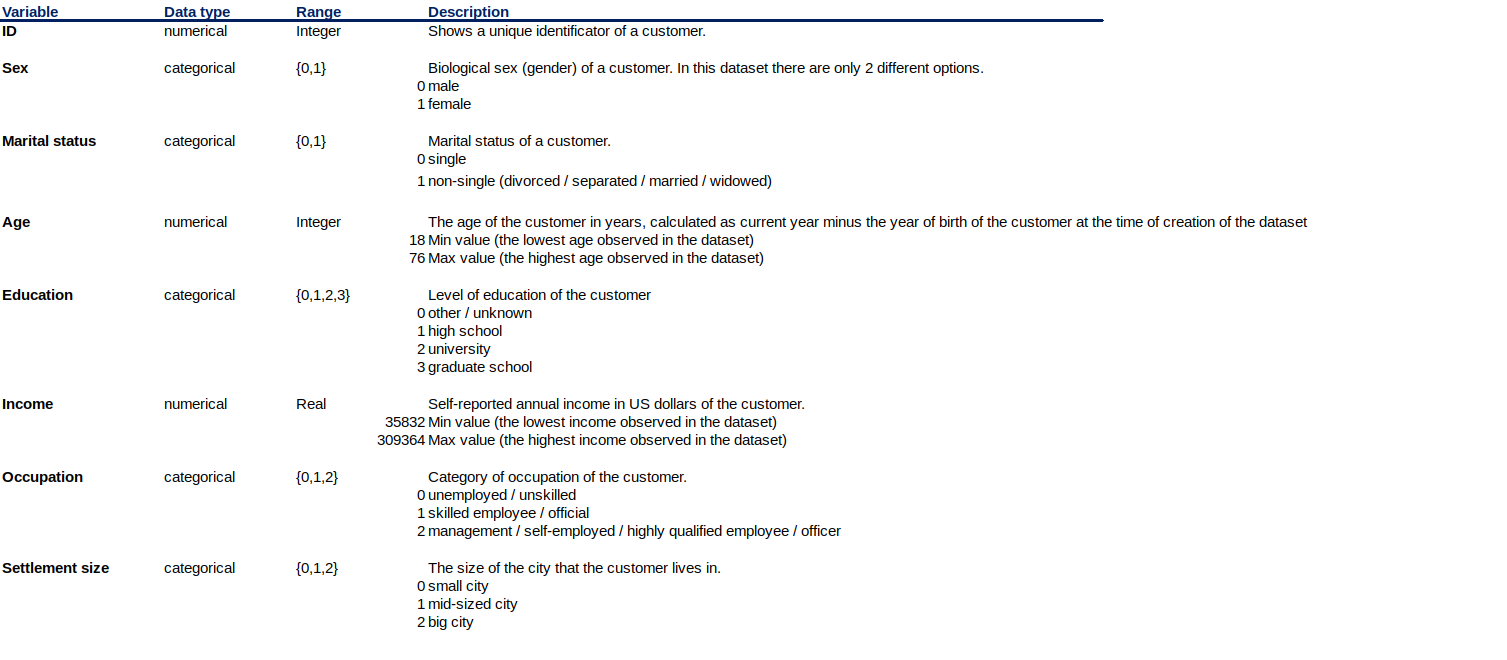

## Customer Data

In [7]:
df=pd.read_csv('segmentation data.csv')

In [8]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### EDA

In [9]:
df.shape

(2000, 8)

In [10]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [13]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


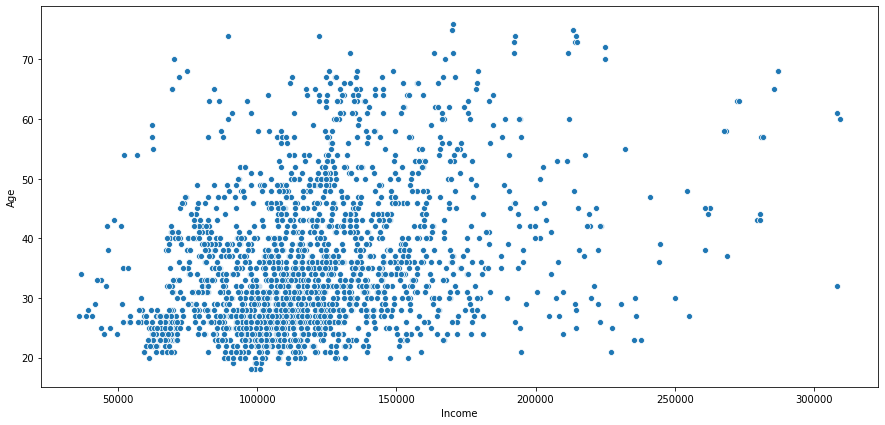

In [14]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Income',y='Age',data=df)

### Scaling The Data 

In [15]:
sc=StandardScaler()

In [16]:
x=df
x.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [17]:
x_standard=sc.fit_transform(x)
x_standard

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Applying Clustering Techniques 

### Hierarchical Clustering

In [18]:
hier_cluster=linkage(x_standard,method='ward')

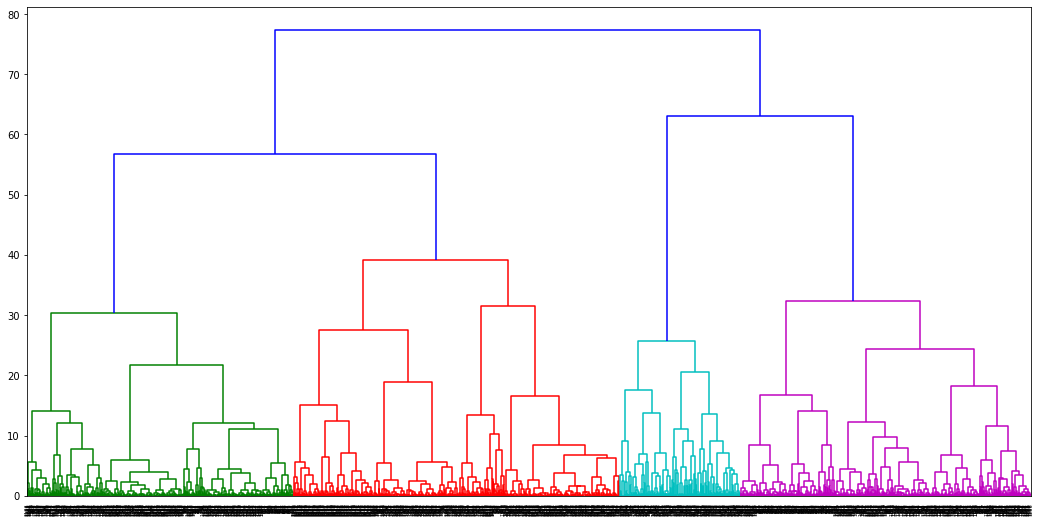

In [19]:
plt.figure(figsize = (18,9))
dendrogram(hier_cluster)
plt.show()

### KMeans Clustering

In [20]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(x_standard)
    a=km.inertia_
    sse.append(a)

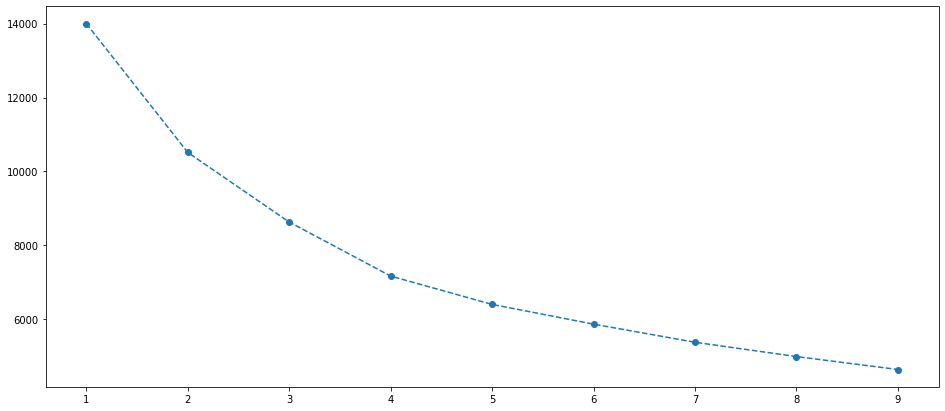

In [21]:
p=range(1,10)
plt.figure(figsize=(16,7))
plt.plot(p,sse,marker = 'o', linestyle = '--')
plt.show()

### It can be seen from the graph that min cluster is 4. 

In [22]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(x_standard)

In [23]:
km_normal=df.copy()

In [24]:
km_normal['cluster']=prediction

In [25]:
km_normal.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [26]:
df1=km_normal[km_normal['cluster']==0]
df2=km_normal[km_normal['cluster']==1]
df3=km_normal[km_normal['cluster']==2]
df4=km_normal[km_normal['cluster']==3]

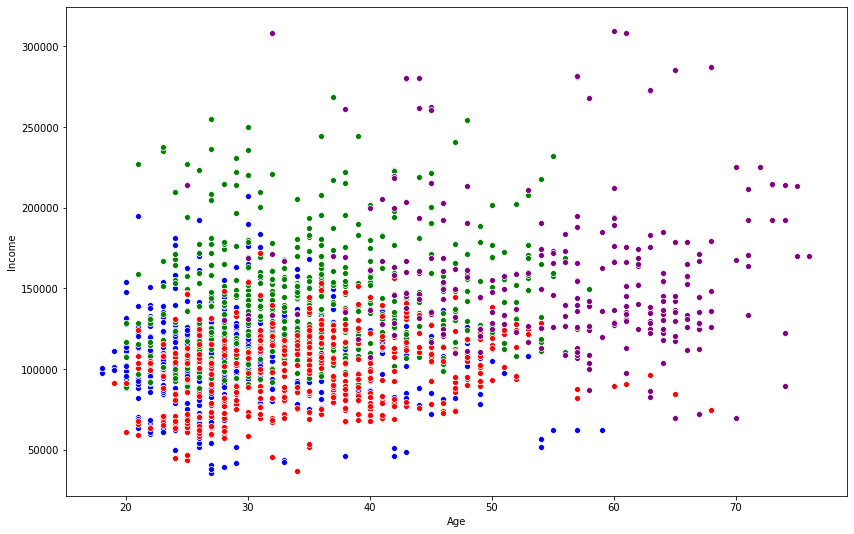

In [27]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Age',y='Income',data=df1,color='blue')
sns.scatterplot(x='Age',y='Income',data=df2,color='green')
sns.scatterplot(x='Age',y='Income',data=df3,color='red')
sns.scatterplot(x='Age',y='Income',data=df4,color='purple')
plt.show()

Mostly the segments are overlapping

## PCA

In [28]:
pca=PCA()

In [29]:
pca.fit(x_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Checking how many features to select

In [30]:
var=pca.explained_variance_ratio_
var

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

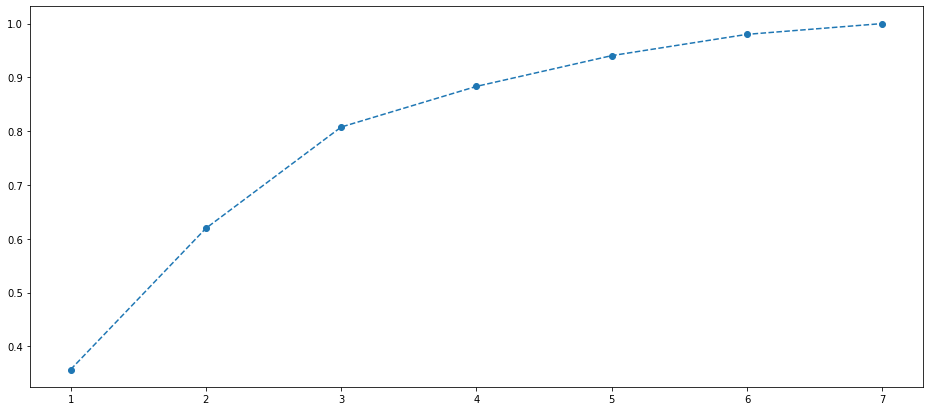

In [31]:
p=range(1,8)
plt.figure(figsize=(16,7))
plt.plot(p,var.cumsum(),marker = 'o', linestyle = '--')
plt.show()

In [32]:
pca=PCA(n_components=3)

In [33]:
pca_data=pca.fit(x_standard)

In [34]:
new_data=pca.transform(x_standard)

In [35]:
new_data

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [36]:
new_data.shape

(2000, 3)

In [37]:
pca_df=pd.DataFrame(new_data,columns=['component1','component2','component3'])
pca_df

,component1,component2,component3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


### K-means clustering with PCA

In [38]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(new_data)
    a=km.inertia_
    sse.append(a)

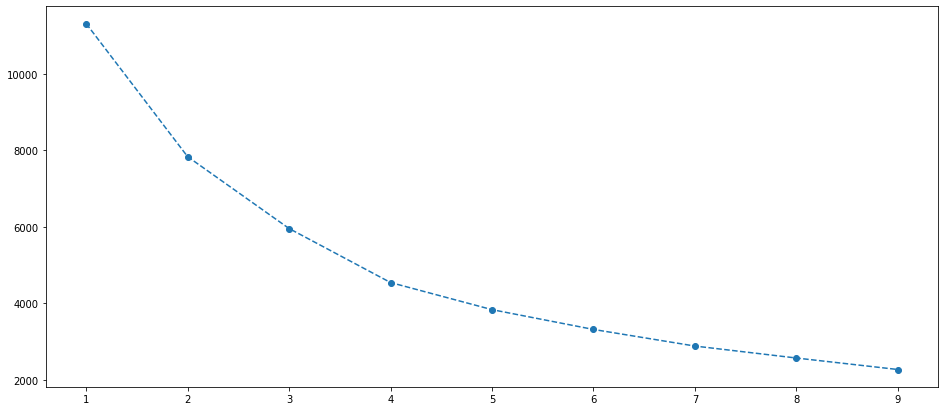

In [39]:
p=range(1,10)
plt.figure(figsize=(16,7))
plt.plot(p,sse,marker = 'o', linestyle = '--')
plt.show()

In [40]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(new_data)

In [41]:
prediction

array([0, 2, 1, ..., 1, 2, 1], dtype=int32)

In [42]:
pca_df['cluster']=prediction

In [43]:
pca_df.head()

,component1,component2,component3,cluster
0,2.514746,0.834122,2.174806,0
1,0.344935,0.598146,-2.211603,2
2,-0.651063,-0.680093,2.280419,1
3,1.714316,-0.579927,0.730731,3
4,1.626745,-0.440496,1.244909,3


In [44]:
df1=pca_df[pca_df['cluster']==0]
df2=pca_df[pca_df['cluster']==1]
df3=pca_df[pca_df['cluster']==2]
df4=pca_df[pca_df['cluster']==3]

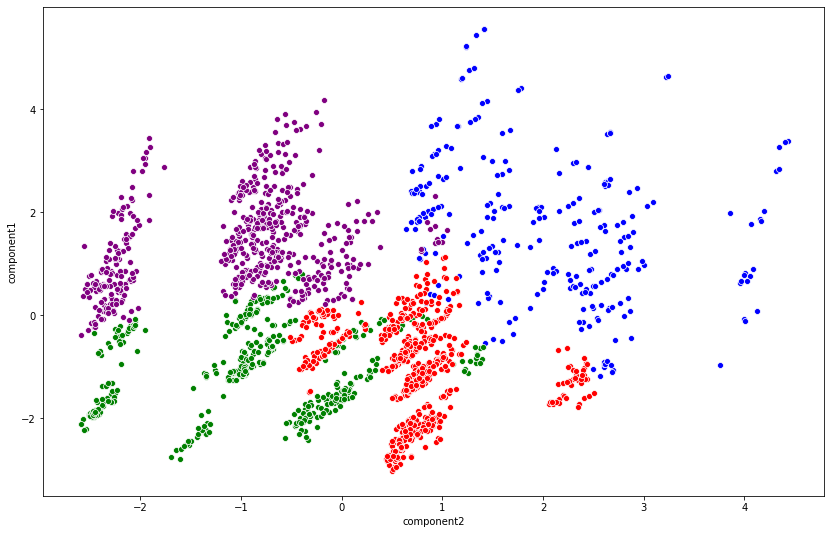

In [45]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='component2',y='component1',data=df1,color='blue')
sns.scatterplot(x='component2',y='component1',data=df2,color='green')
sns.scatterplot(x='component2',y='component1',data=df3,color='red')
sns.scatterplot(x='component2',y='component1',data=df4,color='purple')
plt.show()

### Now we can distinguish the clusters

### Saving the customer model

In [46]:
with open('scaler.pickle','wb') as f:
    pickle.dump(sc,f)

In [47]:
with open('pca.pickle','wb') as f:
    pickle.dump(pca,f)

In [48]:
with open('kmeans.pickle','wb') as f:
    pickle.dump(km,f)

## Completed customer segmentation